<a href="https://colab.research.google.com/github/Yansun3/vertex-ai-creative-studio/blob/main/%5BBlogpost%5D_Case_Study_1_Cymber_Coffee_Image_Generation_with_Brand_Adherence_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 1. Asset Input ---
Enter a description of the desired final asset (e.g., 'A modern website banner'): A modern website banner featuring Thanksgiving Campaign 
Enter the Desired Brand Tone (e.g., 'Hospitable, Honorable, Refined & Trustworthy'): Cymber Coffee is the public perception, built cup by cup by the people who experience our coffee and our service. Cymber Coffee is the pathway to authentic, transparently sourced coffee, always presented with genuine expertise and a soothing, natural, warmth. 

Please upload the existing brand asset (Image, PDF, or TXT file) for evaluation...


Saving Cymber Coffee Brand Guideline .pdf to Cymber Coffee Brand Guideline .pdf
Uploaded file: Cymber Coffee Brand Guideline .pdf (application/pdf)

--- 2. Evaluating Asset (Gemini Flash) ---
✅ Evaluation Complete.


## 📋 Evaluation Findings

### Colorpalette Asset Check
- **Identifiedcolors**: Primary Dark (Forest Green), Primary Accent (Bronze/Oak), Off-White (Soothing), Mid Darks (Moss Gray)
- **Coloranalysis**: The asset presents a harmonious color palette named 'Forest Tones,' featuring greens, browns, and off-white. These colors align well with the desired brand tone of 'soothing, natural, warmth' and 'organic' authenticity.
### Gibberishcheck
- **Gibberishdetected**: False
- **Details**: No unreadable, distorted, or foreign text/symbols were detected. The text throughout the brand guide is clear and professionally presented.
### Logoconsistency Asset Check
- **Logofound**: True
- **Consistencyreport**: The brand guide comprehensively details the Cymber Coffee logo system, including primary icon, vertical lockup, and horizontal lockup. It provides clear guidelines for usage, clear space, and prohibited actions (e.g., no stretching, no effects, no color changes), ensuring high consistency. The logos presented within the document adhere to these guidelines.
### Abstract/Artistic Compliance
- **Brand Tone Score**: 9/10
- **Aesthetics Score**: 9/10
- **Realism Score**: 9/10
- **Creativity Score**: 7/10
- **Summary**: The brand guide effectively communicates the desired brand tone of 'soothing, natural warmth' and 'authentic expertise' through its explicit statements, keyword usage, and carefully chosen color palette. Its aesthetic design is professional, clean, and well-organized, ensuring high readability and brand coherence. The document provides a realistic and functional framework for the brand's visual identity. While professionally executed, its creative design adheres to standard brand guide formats rather than offering a uniquely innovative visual approach.
**Assetqualitysummary**: The provided asset is a comprehensive and well-designed brand standards and style guide for Cymber Coffee. It successfully identifies and employs a harmonious color palette ('Forest Tones') consistent with the brand's natural and soothing identity, features clearly defined and consistently presented logos with explicit usage guidelines, and contains no gibberish or unreadable text. The guide effectively communicates the desired brand tone of authentic expertise and natural warmth through its content and aesthetic. However, the asset itself is a brand guide and not the requested 'modern website banner featuring Thanksgiving Campaign,' representing a fundamental mismatch with the desired output type.



--- 3. Rewriting Prompt (Gemini Flash) ---
✅ New Image Prompt Generated.


## 📝 Optimized Image Prompt

> *A modern, high-quality website banner for Cymber Coffee's Thanksgiving Campaign. The design should embody natural warmth and authentic expertise with an organic, soothing aesthetic. Integrate elegant coffee-related elements with subtle, sophisticated autumn foliage and gourds. The color palette must strictly adhere to Cymber Coffee's 'Forest Tones': Forest Green, Bronze/Oak, Soothing Off-White, and Moss Gray. Visually incorporate the provided Cymber Coffee logo prominently. The banner should be clean, professional, and inviting, with optional placeholder text like 'Warmth & Gratitude' or 'Seasonal Harvest'.*


--- 4. Generating Final Image (gemini-2.5-flash-image) ---
⏳ Waiting for Gemini generation...
⚠️ Model Message: Here's a modern, high-quality website banner for Cymber Coffee's Thanksgiving Campaign, embodying natural warmth and authentic expertise with an organic, soothing aesthetic. It integrates elegant coffee-related elements with subtle, sophisticated autumn foliage and gourds, adhering to Cymber Coffee's 'Forest Tones' color palette. The Cymber Coffee logo is prominently incorporated, and it includes placeholder text "Warmth & Gratitude."

 

✅ Image Generated Successfully.


## ✨ Final Generated Asset

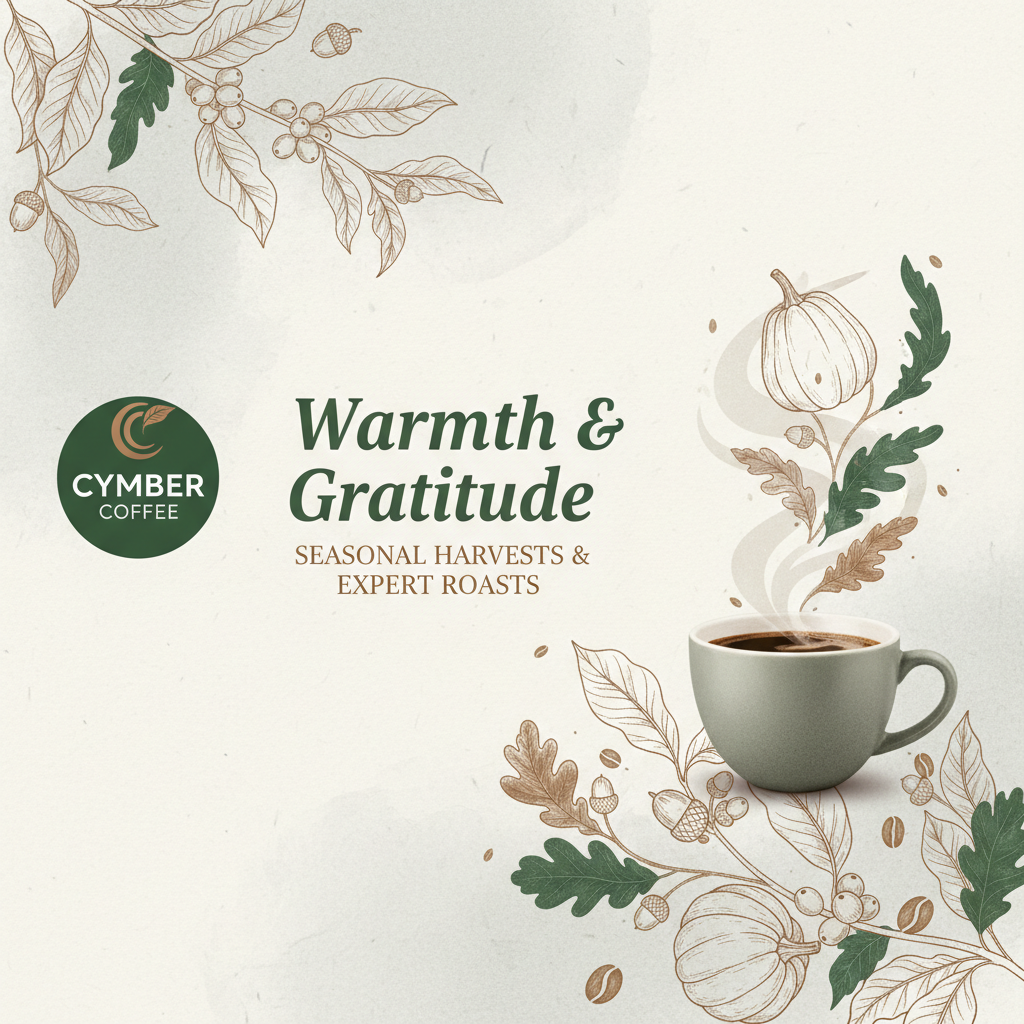


---
## Workflow Complete
Evaluation, rewrite, and image generation finished.

In [ ]:
# ==============================================================================
# 1. SETUP AND AUTHENTICATION
# ==============================================================================
!pip install google-genai

# Imports
import os
import json
import base64
from IPython.display import display, Markdown, Image
from google import genai
from google.genai import types
from google.colab import files

# ==============================================================================
# 2. CONFIGURATION AND CONSTANTS
# ==============================================================================

# 🚨 IMPORTANT: REPLACE THIS WITH YOUR ACTUAL API KEY
API_KEY = ""

# Initialize the Gemini client
client = genai.Client(api_key=API_KEY)

# Model Configuration
GEMINI_MODEL = ""
# SPECIFIC UPDATE: Use the dedicated image generation model
IMAGE_GEN_MODEL = ""

# JSON Schema for the structured evaluation
EVALUATION_SCHEMA = types.Schema(
    type=types.Type.OBJECT,
    properties={
        "colorPaletteEvaluation": types.Schema(
            type=types.Type.OBJECT,
            description="Evaluation of the asset's color use.",
            properties={
                "identifiedColors": types.Schema(type=types.Type.ARRAY, items=types.Schema(type=types.Type.STRING), description="List of primary and secondary colors detected in the asset."),
                "colorAnalysis": types.Schema(type=types.Type.STRING, description="A brief analysis of the color harmony or lack thereof."),
            }
        ),
        "gibberishCheck": types.Schema(
            type=types.Type.OBJECT,
            description="Check for unintended or gibberish text/artifacts.",
            properties={
                "gibberishDetected": types.Schema(type=types.Type.BOOLEAN, description="True if unreadable, distorted, or foreign text/symbols are present."),
                "details": types.Schema(type=types.Type.STRING, description="Specifics of any detected gibberish or artifacts."),
            }
        ),
        "logoConsistencyEvaluation": types.Schema(
            type=types.Type.OBJECT,
            description="Evaluation of any logo elements for adherence to guidelines or visual integrity.",
            properties={
                "logoFound": types.Schema(type=types.Type.BOOLEAN, description="True if a logo or strong brand mark is visible."),
                "consistencyReport": types.Schema(type=types.Type.STRING, description="Detailed report on the logo's appearance, placement, shape, and potential inconsistencies."),
            }
        ),
        "abstractComplianceEvaluation": types.Schema(
            type=types.Type.OBJECT,
            description="Evaluation of abstract and artistic compliance (aesthetics, brand tone, creativity).",
            properties={
                "brandToneScore": types.Schema(type=types.Type.INTEGER, description="A score from 1-10 on how well the image evokes the desired brand tone."),
                "aestheticsScore": types.Schema(type=types.Type.INTEGER, description="A score from 1-10 on the image's beauty, artistry, and composition."),
                "realismScore": types.Schema(type=types.Type.INTEGER, description="A score from 1-10 on how real the image looks (lack of 'uncanny valley')."),
                "creativityScore": types.Schema(type=types.Type.INTEGER, description="A score from 1-10 on the image's originality and creativity."),
                "abstractSummary": types.Schema(type=types.Type.STRING, description="A brief rationale explaining the scores, especially the brand tone compliance.")
            }
        ),
        "assetQualitySummary": types.Schema(type=types.Type.STRING, description="A single, concise paragraph summarizing ALL identified weaknesses and strengths (color, logo, gibberish, and abstract compliance) of the uploaded asset to guide the prompt rewrite.")
    }
)


# ==============================================================================
# 3. UTILITY FUNCTIONS for File Handling
# ==============================================================================

def upload_file_and_get_parts():
    """Prompts the user to upload a file and returns the content parts for the model."""
    print("--- 1. Asset Input ---")

    # 1. Get initial context
    context_prompt = input("Enter a description of the desired final asset (e.g., 'A modern website banner'): ").strip()
    brand_tone = input("Enter the Desired Brand Tone (e.g., 'Hospitable, Honorable, Refined & Trustworthy'): ").strip()

    if not context_prompt or not brand_tone:
        print("Context description and Brand Tone are required.")
        return None

    # 2. Upload File (Image, PDF, or TXT)
    print("\nPlease upload the existing brand asset (Image, PDF, or TXT file) for evaluation...")
    try:
        uploaded = files.upload()
    except Exception as e:
        print(f"File upload failed: {e}")
        return None

    if not uploaded:
        print("No file uploaded.")
        return None

    file_name = list(uploaded.keys())[0]
    file_bytes = uploaded[file_name]

    # Determine file type and create the model parts list
    content_parts = []

    # Initial text part (will be updated for TXT files)
    user_prompt = (
        f"Analyze the accompanying asset and the following desired asset context. "
        f"Strictly evaluate it based on color, gibberish, logo consistency, and abstract compliance (aesthetics/brand tone). "
        f"Strictly return all evaluation sections in the requested JSON schema. "
        f"Desired Asset Context: {context_prompt}. "
        f"Desired Brand Tone: '{brand_tone}'."
    )
    text_part = types.Part(text=user_prompt)
    content_parts.append(text_part)

    # File part processing
    mime_type = None
    if file_name.lower().endswith(('.txt')):
        try:
            # For TXT, append content to the text prompt
            text_content = file_bytes.decode('utf-8')
            full_prompt = f"{user_prompt}\n\n--- Document Content ---\n{text_content}"
            content_parts[0] = types.Part(text=full_prompt) # Update the text part
            print(f"Uploaded TXT file: {file_name}")
        except Exception as e:
            print(f"Error reading TXT file: {e}")
            return None

    elif file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.pdf')):
        # For Image/PDF, send as inlineData
        if file_name.lower().endswith(('.png')):
            mime_type = 'image/png'
        elif file_name.lower().endswith(('.jpg', '.jpeg')):
            mime_type = 'image/jpeg'
        elif file_name.lower().endswith(('.pdf')):
             mime_type = 'application/pdf'

        file_part = types.Part.from_bytes(data=file_bytes, mime_type=mime_type)
        content_parts.append(file_part)
        print(f"Uploaded file: {file_name} ({mime_type})")

    else:
        print("Unsupported file type. Please use an image (jpg, png), PDF, or TXT.")
        return None

    return content_parts

def upload_optional_logo():
    """Prompts the user to upload a reference logo image and returns the logo Part object."""
    print("\n--- Optional Logo Upload ---")
    print("The asset check found no consistent logo. Please upload a separate reference logo image (PNG or JPG) now.")
    try:
        uploaded = files.upload()

        if not uploaded:
            print("No reference logo uploaded.")
            return None

        file_name = list(uploaded.keys())[0]
        file_bytes = uploaded[file_name]

        if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            mime_type = 'image/png' if file_name.lower().endswith(('.png')) else 'image/jpeg'
            logo_part = types.Part.from_bytes(data=file_bytes, mime_type=mime_type)
            print(f"Uploaded reference logo: {file_name} ({mime_type}). This will guide the final image generation.")
            return logo_part
        else:
            print("Unsupported file type for logo. Please use a PNG or JPG image.")
            return None

    except Exception as e:
        print(f"Logo upload failed: {e}")
        return None


# ==============================================================================
# 4. CORE LOGIC FUNCTIONS
# ==============================================================================

def evaluate_asset(content_parts):
    """Step 2: Uses Gemini for multi-modal structured evaluation."""
    print("\n--- 2. Evaluating Asset (Gemini Flash) ---")

    try:
        # Configuration for structured JSON output
        config = types.GenerateContentConfig(
            response_mime_type="application/json",
            response_schema=EVALUATION_SCHEMA,
        )

        response = client.models.generate_content(
            model=GEMINI_MODEL,
            contents=content_parts,
            config=config,
        )

        guidelines_json_str = response.candidates[0].content.parts[0].text
        evaluation_data = json.loads(guidelines_json_str)

        print("✅ Evaluation Complete.")
        display(Markdown("## 📋 Evaluation Findings"))

        # Display the structured findings
        md_output = ""
        for section, data in evaluation_data.items():
            if isinstance(data, dict):
                # Handle the new Abstract Compliance section specially
                if section == "abstractComplianceEvaluation":
                    md_output += f"### Abstract/Artistic Compliance\n"
                    md_output += f"- **Brand Tone Score**: {data.get('brandToneScore', 'N/A')}/10\n"
                    md_output += f"- **Aesthetics Score**: {data.get('aestheticsScore', 'N/A')}/10\n"
                    md_output += f"- **Realism Score**: {data.get('realismScore', 'N/A')}/10\n"
                    md_output += f"- **Creativity Score**: {data.get('creativityScore', 'N/A')}/10\n"
                    md_output += f"- **Summary**: {data.get('abstractSummary', 'N/A')}\n"
                else:
                    md_output += f"### {section.replace('Evaluation', ' Asset Check').title()}\n"
                    for key, value in data.items():
                        display_value = ', '.join(value) if isinstance(value, list) else str(value)
                        md_output += f"- **{key.replace('_', ' ').title()}**: {display_value}\n"
            else:
                md_output += f"**{section.replace('_', ' ').title()}**: {data}\n"

        display(Markdown(md_output))
        return evaluation_data

    except Exception as e:
        print(f"❌ Failed to extract evaluation: {e}")
        return None


def rewrite_prompt(evaluation_data):
    """Step 3: Uses Gemini to convert structured evaluation into an optimized image prompt."""
    print("\n--- 3. Rewriting Prompt (Gemini Flash) ---")

    try:
        # Use the summary and full data to inform the rewrite
        evaluation_summary = evaluation_data.get('assetQualitySummary', 'No specific quality issues found.')

        # System instruction for the prompt engineer persona
        system_prompt = (
            "You are an AI Image Prompt Optimization Expert. Your goal is to rewrite the user's initial desired asset context "
            "based on the provided brand asset evaluation. The new prompt must be high-quality, concise, "
            "and specifically address the weaknesses found in the evaluation (e.g., if colors were dull, request 'vibrant, saturated colors'). "
            "If the summary mentions a reference logo was provided, ensure the new prompt includes instructions for incorporating a visually logo "
        )

        # 1. Get the full text from the first part of our content_parts list
        global content_parts
        original_prompt_text = content_parts[0].text

        # 2. Extract the initial context provided by the user.
        initial_context_full = original_prompt_text.split('Desired Asset Context: ')[-1]
        initial_context = initial_context_full.split('. Desired Brand Tone: ')[0].strip()

        user_query = (
            f"Initial Context: {initial_context}\n"
            f"Evaluation Summary: {evaluation_summary}\n"
            f"Full Evaluation: {json.dumps(evaluation_data, indent=2)}\n\n"
            "Based on this data, provide the single, optimized, high-quality image prompt."
        )

        response = client.models.generate_content(
            model=GEMINI_MODEL,
            contents=[user_query],
            config=types.GenerateContentConfig(
                system_instruction=types.Part(text=system_prompt)
            )
        )

        new_prompt = response.candidates[0].content.parts[0].text.strip()
        print("✅ New Image Prompt Generated.")
        display(Markdown(f"## 📝 Optimized Image Prompt\n\n> *{new_prompt}*"))
        return new_prompt

    except Exception as e:
        print(f"❌ Failed to generate new prompt: {e}")
        return None


def generate_image(image_prompt):
    """Step 4: Calls the Gemini API to generate the final visual asset."""
    print(f"\n--- 4. Generating Final Image ({IMAGE_GEN_MODEL}) ---")

    try:
        print("⏳ Waiting for Gemini generation...")

        # Call standard generate_content.

        response = client.models.generate_content(
            model=IMAGE_GEN_MODEL,
            contents=image_prompt,
        )

        # Iterate through parts to handle both text (refusals) and images.
        image_found = False
        for part in response.parts:
            if part.text:
                print(f"⚠️ Model Message: {part.text}")
            elif part.inline_data:
                print("✅ Image Generated Successfully.")
                display(Markdown("## ✨ Final Generated Asset"))
                # Display the raw image bytes directly using IPython.display.Image
                display(Image(data=part.inline_data.data))
                image_found = True

        if not image_found and not any(p.text for p in response.parts):
             print("⚠️ No content returned from the model.")

    except Exception as e:
        print(f"❌ Image generation failed: {e}")


# ==============================================================================
# 5. EXECUTION BLOCK
# ==============================================================================

# Global variable to hold content parts
content_parts = None

def main_workflow():
    """Executes the four-step process."""
    global content_parts
    logo_part = None

    # Step 1: Get user input and file parts
    content_parts = upload_file_and_get_parts()
    if not content_parts:
        return

    # Step 2: Evaluate asset based on criteria
    evaluation_data = evaluate_asset(content_parts)
    if not evaluation_data:
        return

    # --------------------------------------------------------------------------
    # Conditional Logo Upload
    # --------------------------------------------------------------------------
    logo_found = evaluation_data.get('logoConsistencyEvaluation', {}).get('logoFound', True)

    if not logo_found:
        logo_part = upload_optional_logo()

    if logo_part:
        content_parts.append(logo_part)
        logo_summary_update = (
            " IMPORTANT: A separate, consistent reference logo image was provided after the initial evaluation."
            "The rewritten prompt MUST include the provided logo and brand name visually."
        )
        current_summary = evaluation_data.get('assetQualitySummary', 'No specific quality issues found.')
        evaluation_data['assetQualitySummary'] = current_summary + logo_summary_update

        # Update text part for VLM context
        original_prompt = content_parts[0].text
        updated_prompt = (
            original_prompt +
            "\n\n--- ADDITIONAL CONTEXT: REFERENCE LOGO ---"
            "\nThe last image provided is a reference logo. Please incorporate it to the new asset visually."
        )
        content_parts[0] = types.Part(text=updated_prompt)

    # --------------------------------------------------------------------------
    # Continue Workflow
    # --------------------------------------------------------------------------

    # Step 3: Generate optimized prompt
    new_prompt = rewrite_prompt(evaluation_data)
    if not new_prompt:
        return

    # Step 4: Generate final image using Gemini
    generate_image(new_prompt)

    display(Markdown("\n---\n## Workflow Complete\nEvaluation, rewrite, and image generation finished."))

# Run the main workflow
if __name__ == "__main__":
    main_workflow()